<a href="https://colab.research.google.com/github/varuncode01/ST_Project6/blob/main/ML_Project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

### **Import Dependancy**

In [ ]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie_Recommendation_Project3/Copy of Copy of movies.csv')

In [ ]:
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:
data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
features = ['genres','keywords','tagline','cast','director']

### **Dealing with null value**

In [ ]:
for feature in features:
  data[feature] = data[feature].fillna('')

In [ ]:
data['combine'] = data['genres']+' '+data['keywords']+' '+data['tagline']+' '+data['cast']+' '+data['director']

In [ ]:
data['combine'].head()

,combine
0,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime spy based on novel secr...
3,Action Crime Drama Thriller dc comics crime fi...
4,Action Adventure Science Fiction based on nove...


## **Converting text data into num data**

In [ ]:
data['combine'] = data['combine'].fillna('')
vector = TfidfVectorizer()
f_vector = vector.fit_transform(data['combine'])
print(f_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 105301 stored elements and shape (4803, 14797)>
  Coords	Values
  (0, 184)	0.08184672657717869
  (0, 244)	0.09173158309078017
  (0, 4531)	0.11206241896451395
  (0, 11598)	0.1051487023954551
  (0, 4672)	0.1051487023954551
  (0, 3151)	0.21697232048980092
  (0, 2603)	0.2218634746903966
  (0, 5016)	0.16329595503417713
  (0, 12278)	0.338496804025432
  (0, 14165)	0.1288575881710676
  (0, 2744)	0.24964183153577163
  (0, 12186)	0.21273541000274554
  (0, 4238)	0.2347287592868746
  (0, 13042)	0.07123931824623539
  (0, 14542)	0.12843732115357012
  (0, 9534)	0.09147007312742254
  (0, 9805)	0.2658501732586547
  (0, 11385)	0.15127684580899567
  (0, 14551)	0.2309915393780477
  (0, 14773)	0.2072826536024352
  (0, 11358)	0.21932374391332066
  (0, 12000)	0.20122052903130186
  (0, 14239)	0.1949789712056719
  (0, 12479)	0.15427243639150282
  (0, 7469)	0.2347287592868746
  :	:
  (4798, 7893)	0.2980843977006345
  (4798, 5847)	0.09530292258145442


In [ ]:
f_vector.shape

(4803, 14797)

## **Similarity scores using cosine similarity**

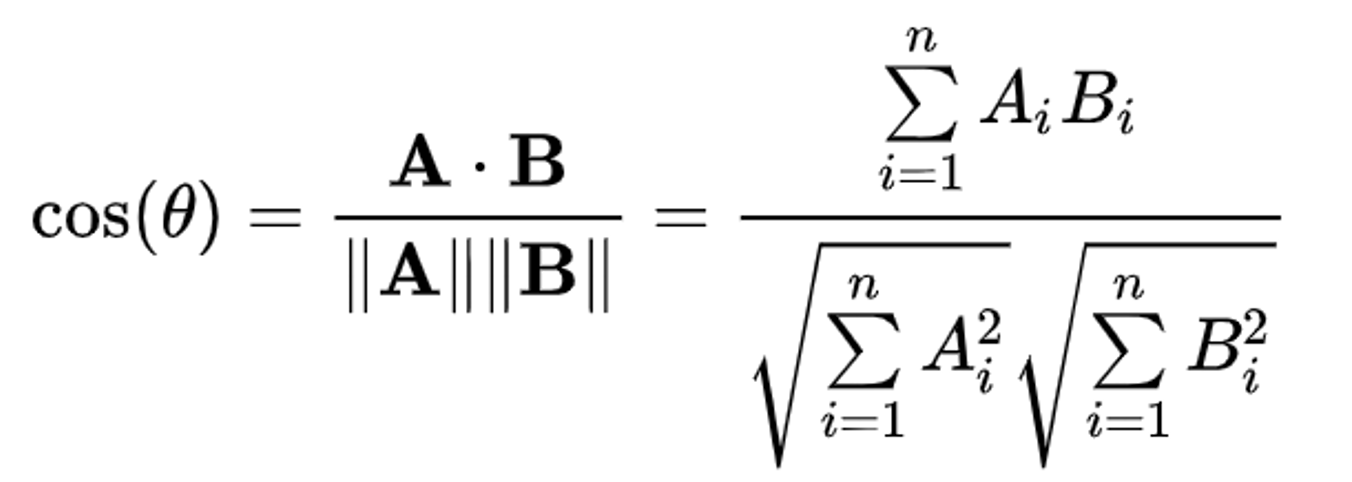

In [ ]:
similarity = cosine_similarity(f_vector)

In [ ]:
print(similarity)

[[1.         0.07404783 0.03923855 ... 0.         0.         0.        ]
 [0.07404783 1.         0.03391318 ... 0.         0.         0.        ]
 [0.03923855 0.03391318 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
similarity.shape

(4803, 4803)

## **Getting movie name from user**

In [ ]:
movie_name = 'iron man'

### **creating a list with all the movie names given in the dataset**

In [ ]:
list_of_all_title = data['title'].tolist()
print(list_of_all_title)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

### **Finding close match for the movie name given by user**

In [ ]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [ ]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [ ]:
index_of_movie = data[data.title == close_match]['index'].values[0]
print(index_of_movie)

68


In [ ]:
data['title'][68]

'Iron Man'

### **GETTING THE SIMILER MOVIES**

In [ ]:
similar_score = list(enumerate(similarity[index_of_movie]))
print(similar_score)

[(0, np.float64(0.03517378263975794)), (1, np.float64(0.056251357064957375)), (2, np.float64(0.01474647619212751)), (3, np.float64(0.007067126982776169)), (4, np.float64(0.03415298178340983)), (5, np.float64(0.014966359699849297)), (6, np.float64(0.07735855516312047)), (7, np.float64(0.24027989908715586)), (8, np.float64(0.008261747589508619)), (9, np.float64(0.07666591001848361)), (10, np.float64(0.0)), (11, np.float64(0.01267962524746134)), (12, np.float64(0.014716617531135845)), (13, np.float64(0.013212740561103387)), (14, np.float64(0.09781307551717208)), (15, np.float64(0.0076304346089049475)), (16, np.float64(0.22875432996534156)), (17, np.float64(0.014064817714457674)), (18, np.float64(0.042594214986554614)), (19, np.float64(0.08070052677030443)), (20, np.float64(0.07916597159737696)), (21, np.float64(0.012135628009909409)), (22, np.float64(0.007277362780344063)), (23, np.float64(0.006951098363949814)), (24, np.float64(0.013418851253223174)), (25, np.float64(0.0)), (26, np.float

In [ ]:
similar_score_sort = sorted(similar_score, key = lambda x:x[1], reverse = True)
print(similar_score_sort)

[(68, np.float64(1.0000000000000002)), (79, np.float64(0.4115471718397885)), (31, np.float64(0.3140488036825864)), (7, np.float64(0.24027989908715586)), (16, np.float64(0.22875432996534156)), (26, np.float64(0.2160639490471172)), (85, np.float64(0.20660784629781714)), (182, np.float64(0.19572160941389144)), (511, np.float64(0.16680987334427747)), (64, np.float64(0.15133016134427035)), (203, np.float64(0.14809345270073798)), (174, np.float64(0.14646373952362562)), (101, np.float64(0.14432272156054202)), (46, np.float64(0.1414576163758994)), (169, np.float64(0.13641938695359695)), (1740, np.float64(0.13597499134145843)), (131, np.float64(0.1350689452532043)), (94, np.float64(0.13461552622647108)), (788, np.float64(0.13217287382803158)), (126, np.float64(0.13205326091692488)), (33, np.float64(0.13044833553061785)), (2487, np.float64(0.12271651979338682)), (661, np.float64(0.12217858087208977)), (783, np.float64(0.1215986960608349)), (2442, np.float64(0.1193180729552202)), (138, np.float64

In [ ]:
data['title'][79]

'Iron Man 2'

In [ ]:
data['title'][31]

'Iron Man 3'

In [ ]:
data['title'][7]

'Avengers: Age of Ultron'

In [ ]:
for i in range(30):
  index = similar_score_sort[i][0]
  print(data['title'][index])

Iron Man
Iron Man 2
Iron Man 3
Avengers: Age of Ultron
The Avengers
Captain America: Civil War
Captain America: The Winter Soldier
Ant-Man
X-Men
X-Men: Apocalypse
X2
The Incredible Hulk
X-Men: First Class
X-Men: Days of Future Past
Captain America: The First Avenger
Kick-Ass 2
G-Force
Guardians of the Galaxy
Deadpool
Thor: The Dark World
X-Men: The Last Stand
Duets
Zathura: A Space Adventure
Mortdecai
Southland Tales
The Last Airbender
Sky Captain and the World of Tomorrow
Tropic Thunder
The Good Night
The Amazing Spider-Man 2


## **Movie Recommendation Sytem**

In [ ]:
def movie_recomend():
  movie_name = input('Enter your favourite movie name :')
  list_of_all_title = data['title'].tolist()
  find_close_match = difflib.get_close_matches(movie_name, list_of_all_title)
  close_match = find_close_match[0]
  index_of_movie = data[data.title == close_match]['index'].values[0]
  similar_score = list(enumerate(similarity[index_of_movie]))
  similar_score_sort = sorted(similar_score, key = lambda x:x[1], reverse = True)
  print('Movies suggested for you : \n')
  for i in range(30):
    index = similar_score_sort[i][0]
    print(data['title'][index])

In [ ]:
movie_recomend()

Enter your favourite movie name :Fight Club
Movies suggested for you : 

Fight Club
Much Ado About Nothing
Cinderella
Alice Through the Looking Glass
The 51st State
Dark Shadows
Big Fish
The King's Speech
The Curse of the Were-Rabbit
Alice in Wonderland
The Curious Case of Benjamin Button
The Lone Ranger
Corpse Bride
Conversations with Other Women
Keeping the Faith
Se7en
Planet of the Apes
Dead Man's Shoes
Kill Bill: Vol. 2
Mr. & Mrs. Smith
Moonrise Kingdom
Highway
Prefontaine
Megamind
The Fault in Our Stars
Suicide Squad
Face/Off
American History X
Lord of War
Alexander


In [ ]:
movie_recomend()

Enter your favourite movie name :Hera Pheri
Movies suggested for you : 

Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
John Carter
Spider-Man 3
Tangled
Avengers: Age of Ultron
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Superman Returns
Quantum of Solace
Pirates of the Caribbean: Dead Man's Chest
The Lone Ranger
Man of Steel
The Chronicles of Narnia: Prince Caspian
The Avengers
Pirates of the Caribbean: On Stranger Tides
Men in Black 3
The Hobbit: The Battle of the Five Armies
The Amazing Spider-Man
Robin Hood
The Hobbit: The Desolation of Smaug
The Golden Compass
King Kong
Titanic
Captain America: Civil War
Battleship
Jurassic World
Skyfall


In [ ]:
movie_recomend()

Enter your favourite movie name :Fight Club
Movies suggested for you : 

Fight Club
Much Ado About Nothing
Cinderella
Alice Through the Looking Glass
The 51st State
Dark Shadows
Big Fish
The King's Speech
The Curse of the Were-Rabbit
Alice in Wonderland
The Curious Case of Benjamin Button
The Lone Ranger
Corpse Bride
Conversations with Other Women
Keeping the Faith
Se7en
Planet of the Apes
Dead Man's Shoes
Kill Bill: Vol. 2
Mr. & Mrs. Smith
Moonrise Kingdom
Highway
Prefontaine
Megamind
The Fault in Our Stars
Suicide Squad
Face/Off
American History X
Lord of War
Alexander
